In [12]:
from src.utils import create_kanji_dataset, TrainingConfig
# import torch

dataset = create_kanji_dataset() # hf dataset

#### Model initializing & Upload to HF 
- To be compatible with training script from HF, we need a 'uploaded SD model' on HF.  

In [3]:
from diffusers import UNet2DConditionModel, DDPMScheduler, AutoencoderKL, PNDMScheduler
from transformers import CLIPTextModel, CLIPTokenizer, CLIPTokenizer
from src.utils import get_transform

# Stable Diffusion 3.5-medium 
# Trying to initialize a randomized-unet + SD3.5 VAE & TextEncoder model and upload to HF, so that training script is directly runnable 
# - I should also consider uploading dataset to HF 

# SD 1.5 model loading

model_name = "stable-diffusion-v1-5/stable-diffusion-v1-5"

text_encoder = CLIPTextModel.from_pretrained(
    model_name, subfolder="text_encoder"
)
vae = AutoencoderKL.from_pretrained(
    model_name, subfolder="vae"
)     

noise_scheduler = PNDMScheduler.from_pretrained(
    model_name, 
    subfolder="scheduler"
)

# Load tokenizer (which was missing before)
tokenizer = CLIPTokenizer.from_pretrained(
    model_name, 
    subfolder="tokenizer"
)   
        
# Conditional Denoise Diffusion Model
# unet = UNet2DConditionModel.from_pretrained(
#     model_name, 
#     subfolder="unet"
# )

unet = UNet2DConditionModel(
    sample_size=128,  # probably 64x64 or 128x128 is enough for Kanji
    in_channels=4,
    out_channels=4,
    layers_per_block=2,
    block_out_channels=(64, 128, 256, 256),  # reduced number of channels
    down_block_types=(
        "CrossAttnDownBlock2D",
        "CrossAttnDownBlock2D",
        "DownBlock2D",
        "DownBlock2D",
    ),
    up_block_types=(
        "UpBlock2D",
        "UpBlock2D",
        "CrossAttnUpBlock2D",
        "CrossAttnUpBlock2D",
    ),
    cross_attention_dim=768,  # Dimension of the text embeddings
)

In [ ]:
from src.utils import evaluate_kanji_pipeline
evaluate_kanji_pipeline(unet, dataset, n_rows=2, n_cols=4, seed=33, out_dir="runs", out_name="kanji_eval.png")

In [5]:
# Debug against minimal training pipeline ... 
from datasets import load_dataset
dataset_name = "lambdalabs/naruto-blip-captions"
dataset = load_dataset(dataset_name)

Repo card metadata block was not found. Setting CardData to empty.


Augment Dataset

In [2]:
from src.utils import augment_dataset, clean_dataset
from datasets import load_dataset, Dataset, DatasetDict

print(":: Loading Original Kanji Dataset")
dataset_name = "Ksgk-fy/kanji-dataset"
dataset = load_dataset(dataset_name)


print(":: Start Augmenting Dataset")
# toy_dataset = Dataset.from_dict(dataset['train'][:2])
# trainset = toy_dataset.map(augment_dataset, batched=True, batch_size=1,remove_columns=toy_dataset.column_names, num_proc=10)
trainset = dataset['train'].map(augment_dataset, batched=True, batch_size=1,remove_columns=dataset['train'].column_names, num_proc=10)
testset = dataset['test'].map(clean_dataset, batched=True, batch_size=1,remove_columns=dataset['test'].column_names, num_proc=10)


print(":: Storing Dataset and upload to HF")
new_dataset = DatasetDict({
    'train': trainset,
    'test': testset
})

# Upload the dataset to the Hub
new_dataset_name = "Ksgk-fy/augmented-kanji-dataset"  # Change this to your desired name

new_dataset.push_to_hub(
    new_dataset_name,
    private=False,  # Set to True if you want it private
)

:: Loading Original Kanji Dataset
:: Start Augmenting Dataset
:: Storing Dataset and upload to HF


Uploading the dataset shards:   0%|          | 0/4 [00:00<?, ?it/s]

Map:   0%|          | 0/43610 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/437 [00:00<?, ?ba/s]

Map:   0%|          | 0/43610 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/437 [00:00<?, ?ba/s]

Map:   0%|          | 0/43610 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/437 [00:00<?, ?ba/s]

Map:   0%|          | 0/43610 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/437 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/574 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/409 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/Ksgk-fy/augmented-kanji-dataset/commit/d92f6040330620d27df6f5ee7cd5b9dac7114f51', commit_message='Upload dataset', commit_description='', oid='d92f6040330620d27df6f5ee7cd5b9dac7114f51', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/Ksgk-fy/augmented-kanji-dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='Ksgk-fy/augmented-kanji-dataset'), pr_revision=None, pr_num=None)

In [3]:
len(trainset)

174440

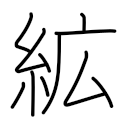

In [21]:
augmented_examples['image'][0]

In [16]:
# Augment Dataset 
from src.utils import augment_dataset
from datasets import load_dataset

dataset = load_dataset("Ksgk-fy/augmented-kanji-dataset")




In [17]:
dataset['train'][0]['image']

[{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x80\x00\x00\x00\x80\x08\x06\x00\x00\x00\xc3>a\xcb\x00\x00\x1ceIDATx\x9c\xed]yT\x14W\xd6\x7f\xd5\xf4\x02t\x03\xdd(\xe2\x86"\x11\xc1%\xb8bD4q\xc1\x11\x1d2n\xb8!\x89\xa3B\\\xa2&g\x12\xa3q4fttf4\x19\xc9\xc4u\x8c\x9e\x83\xd1L\xe2\x96\xa3\xc6-&,\xcd*{\x0b"\x88\xc8\xbe6\xd0\r\xbd\xd1k}\x7f\xc4\xaa\xefu\xa7\xd7\xaa\xean\x95\xfe\x9dS\xe7\xd4\x83z\xf7\xdd\xae\xfa\xd5\xab\xf7\xee\xbb\xf7>\x04EQ\x14\xb8\xd0gAs\xb6\x02.8\x17.\x02\xf4q\xb8\x08\xd0\xc7\xe1"@\x1f\x87\x8b\x00}\x1c.\x02\xf4q\xb8\x08\xd0\xc7\xe1"@\x1f\x87\x8b\x00}\x1c.\x02\xf4q\xb8\x08\xd0\xc7\xe1\x14\x02477\xb7\xc5\xc7\xc7g\xc5\xc5\xc5e7444;C\x07\xaa\xa0\xd3\xe9tYYY\xa5\x8d\x8d\x8d-\xce\xd6\x85\x10P\'\xe0\x9dw\xde\xc9\x04\x00\xa0\x00\x004666\xc7\x19:P\x85\x95+Wf\x03\x00P6\x9b-MNN\xcet\xb6>\xb6\xc2)=\x80\\.w\xc3\xcesrr\x02\x9d\xa1\x03U\xb8~\xfd\xfaD\x00\x00\x90\xc9d\xecu\xeb\xd6E\\\xbat)\xc7\xd9:\xd9\x02\xa7\x10 $$\xa4\x17;onn\xf6\xd7\xe9t:g\xe8A\x05\xe2\xe3\xe3\xf3\xb1s\x9dNGK

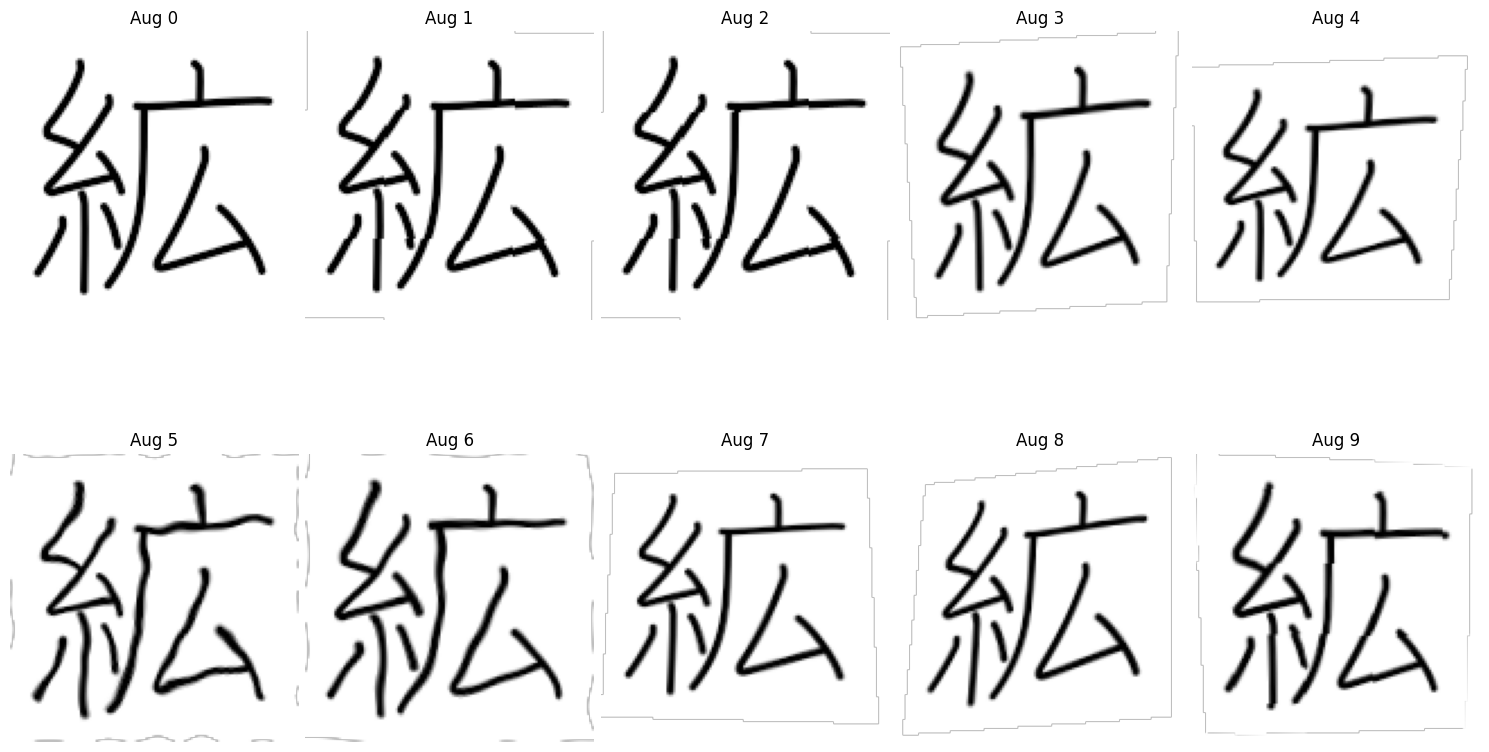

In [7]:
import matplotlib.pyplot as plt

# Create a figure with subplots for each augmented image
n_images = len(augmented_examples['image'])
n_cols = 5  # You can adjust this
n_rows = (n_images + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Plot each augmented image
for idx, img in enumerate(augmented_examples['image']):
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_title(f'Aug {idx}')

# Remove empty subplots if any
for idx in range(n_images, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(h_pad=0.1, w_pad=0.5)  # Reduce spacing between subplots
plt.show()

In [7]:
from diffusers import StableDiffusionPipeline

# Create the complete pipeline
pipeline = StableDiffusionPipeline(
    vae=vae,
    text_encoder=text_encoder,
    tokenizer=tokenizer,
    unet=unet,
    scheduler=noise_scheduler,
    safety_checker=None,  # Optional: set to None if you don't need content filtering
    feature_extractor=None,  # Optional: set to None if you don't need feature extraction
    requires_safety_checker=False
)

from src.utils import rgb_to_gray
img = pipeline("girrafe on a plane", num_inference_steps=25).images[0]
gray_img = rgb_to_gray(img)
gray_img # visualize and check gray scale conversion